The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.

)

In [3]:
#import the required libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('insurance.csv')
data.sample(10, replace=False)

,age,sex,bmi,children,smoker,region,charges
407,47,female,23.600,1,no,southwest,8539.67100
43,37,female,30.800,2,no,southeast,6313.75900
250,18,male,17.290,2,yes,northeast,12829.45510
668,62,male,32.015,0,yes,northeast,45710.20785
721,53,male,36.600,3,no,southwest,11264.54100
882,21,female,22.135,0,no,northeast,2585.85065
137,22,male,25.175,0,no,northwest,2045.68525
1303,43,male,27.800,0,yes,southwest,37829.72420
1249,32,male,33.630,1,yes,northeast,37607.52770
541,20,female,31.790,2,no,southeast,3056.38810





*   'Age'- age of the insured (primary beneficiery). 

*   'Sex'- Gender of the beneficiery. 


*   'BMI' is body mass index which is obtained by dividing weight in kilograms with the square of height in meters. 

*   'Region'- means residence of the beneficiery in any of the 4 US regions-northeast, southeast, southwest, northwest. 



*   'Smoker' - if the person smokes or not. 

*   'Charges' include the medical charges.



*   
'Children' - Number of kids of the primary beneficiery. 



## A. Data Cleansing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#check if data has null
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

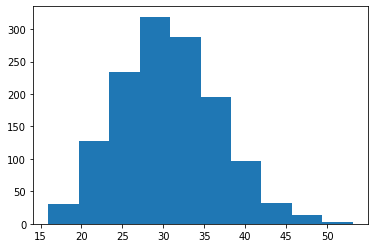

In [8]:
plt.hist(data.bmi)

In [9]:
# removing outliers from BMI feature if the value is greater than 3 std
data['zscore_bmi'] = (data.bmi - data.bmi.mean())/data.bmi.std()
data = data[data['zscore_bmi'] <=3]
data.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447


In [10]:
# removing outliers from BMI feature if the value is greater than 3 std
data['zscore_bmi'] = (data.bmi - data.bmi.mean())/data.bmi.std()
data = data[data['zscore_bmi'] >=3]
data.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.450190
1,18,male,33.770,1,no,southeast,1725.55230,0.527992
2,28,male,33.000,3,no,southeast,4449.46200,0.399679
3,33,male,22.705,0,no,northwest,21984.47061,-1.315889
4,32,male,28.880,0,no,northwest,3866.85520,-0.286882


A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  But in this case, nothing will change, because there is no special order in which the regions would be listed. So I'm being very lazy only used the Label Encoder.

In [11]:
data.corr()['charges'].sort_values()

children      0.067569
zscore_bmi    0.200799
bmi           0.200799
age           0.301360
charges       1.000000
Name: charges, dtype: float64

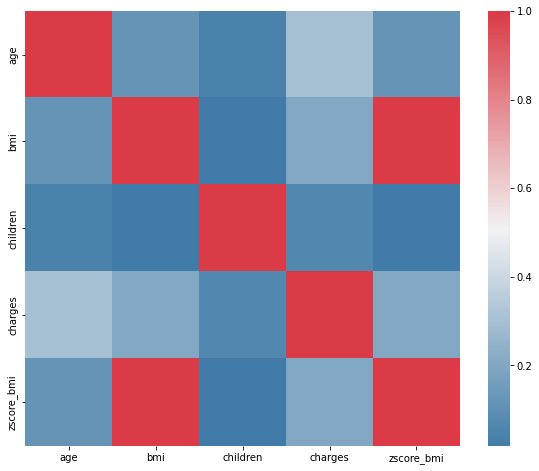

In [12]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking the patient.  To be honest, I expected a higher correlation with bmi.  Well. We investigate smoking in more detail.


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

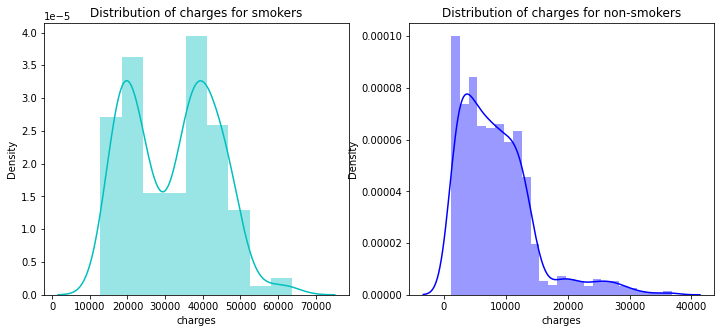

In [13]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

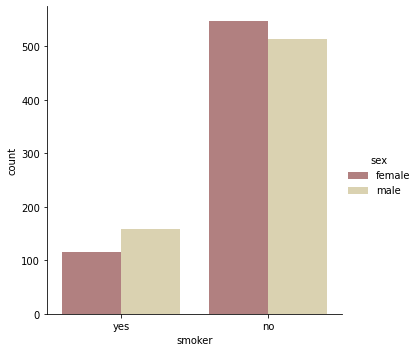

In [14]:

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. 
Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later.
And some more useful visualizations. 

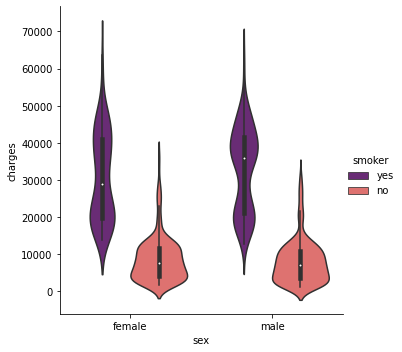

In [15]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

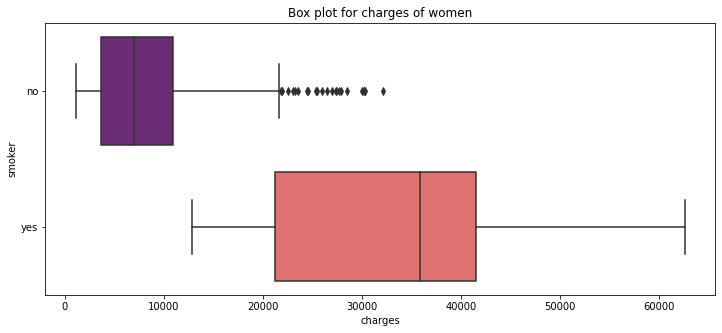

In [16]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'male')] , orient="h", palette = 'magma')

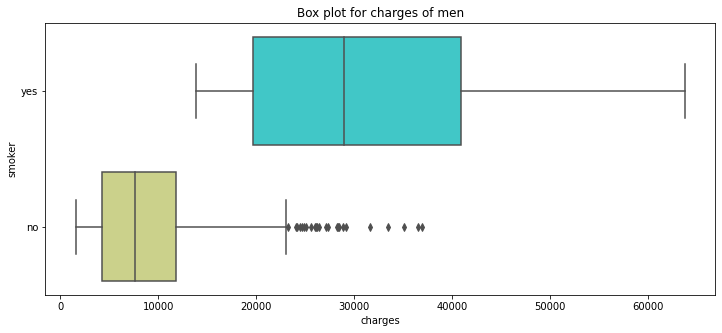

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'female')] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

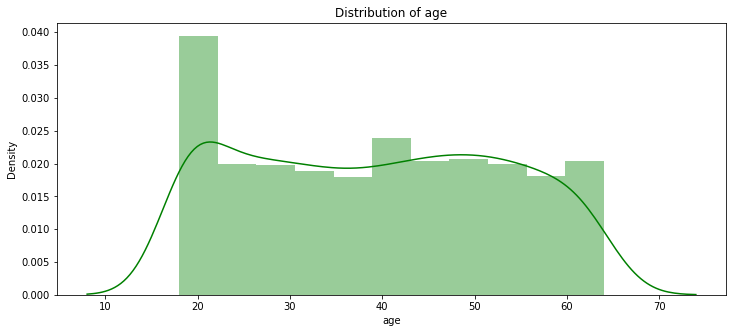

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 
My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

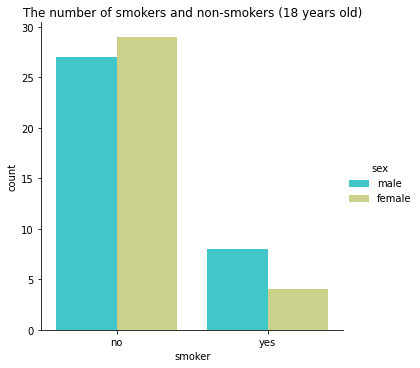

In [19]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

Oh. I was hoping the result would be different.
18 years old - a very young age. Does smoking affect the cost of treatment at this age?


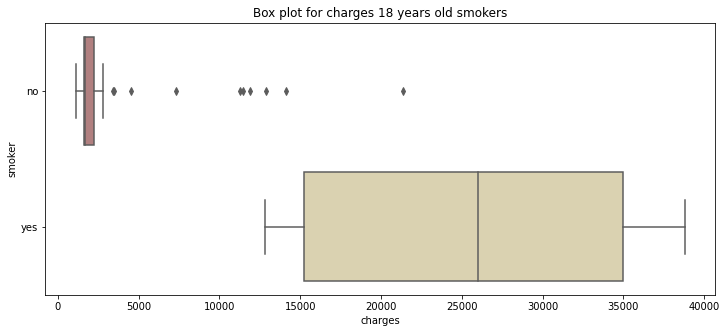

In [20]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')



Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.
Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

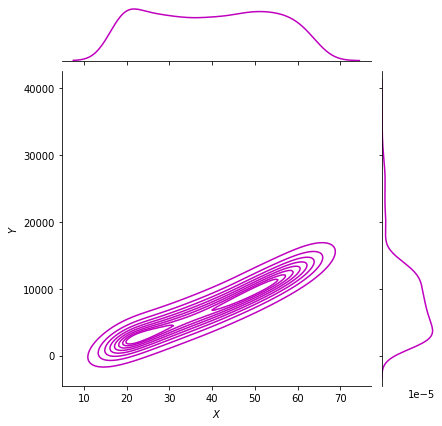

In [21]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'no')],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

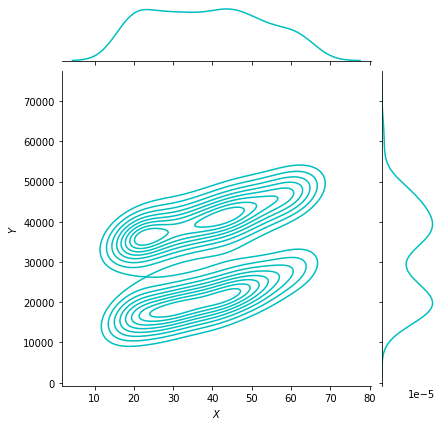

In [22]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'yes')],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

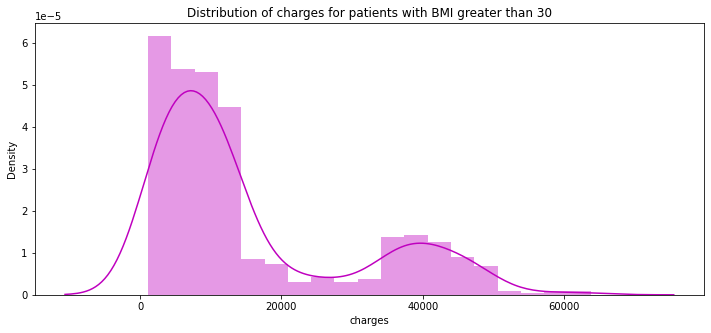

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

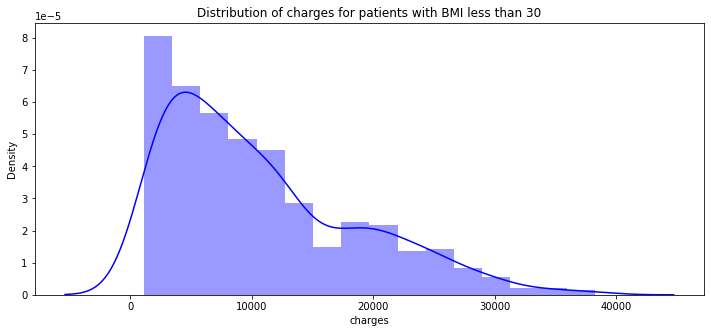

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Text(0.5, 1.0, 'Distribution of bmi and charges')

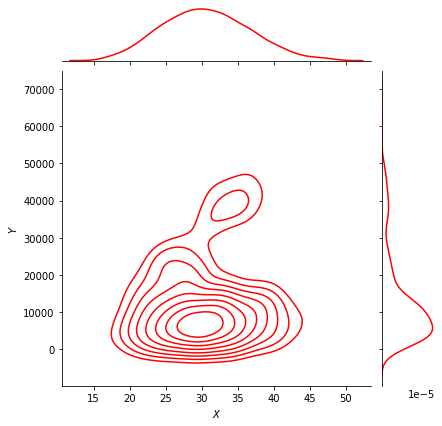

In [25]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


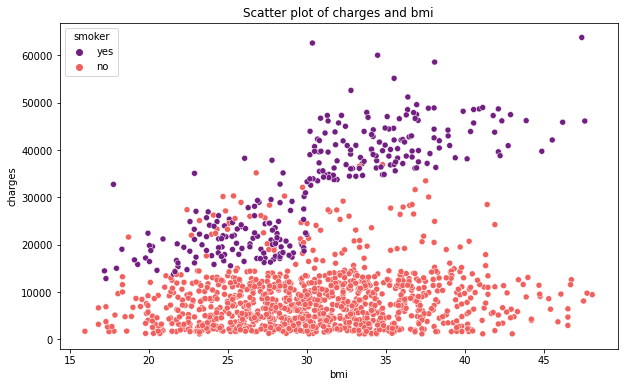

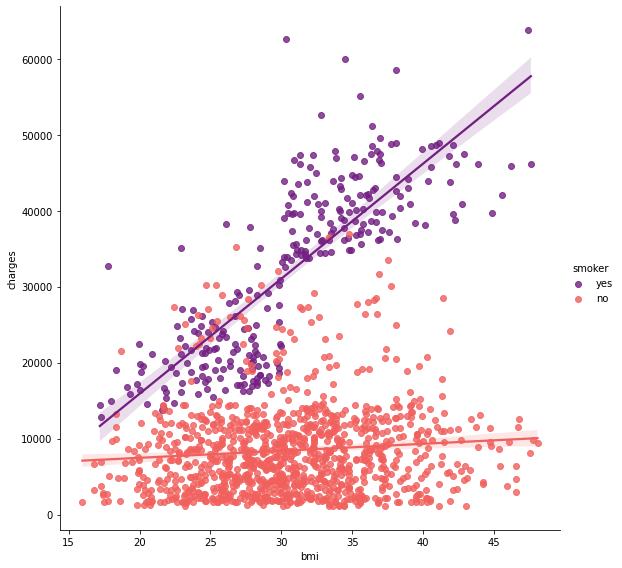

In [26]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.


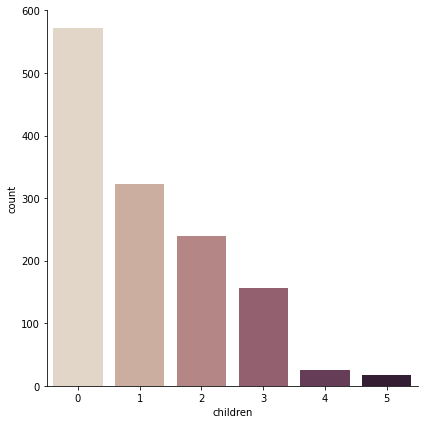

In [27]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)
I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

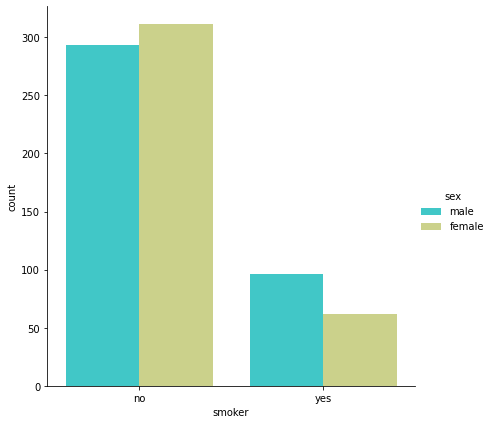

In [28]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

# Conducting a formal significance test for one of the hypotheses and discuss the results 



## **1. Significance  Test for the average charges: by Gender**


In [29]:
#Calculate the average charges by gender and test if it is statistically significant
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13951.308861
Name: charges, dtype: float64

H0: no diffrence in mean charges between male and female

H1: There is significant difference in mean charges between male and female

In [30]:

import pandas as pd
from scipy import stats

F, p = stats.f_oneway(data['charges'][data['sex']==1], data['charges'][data['sex']==0])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# ''''''


p-value for significance is:  nan
accept null hypothesis


## **2. Significance  Test for the average charges: by Gender**


In [31]:
#Calculate the average charges by smoker and test if it is statistically significant
data.groupby('smoker')['charges'].mean()

smoker
no      8443.994935
yes    32004.623164
Name: charges, dtype: float64

H0: no diffrence in mean charges between smoker and non smoker

H1: There is significant diffrence in mean charges between smoker and non smoker

In [32]:
F, p = stats.f_oneway(data['charges'][data['smoker']==1], data['charges'][data['smoker']==0])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# ''''''

p-value for significance is:  nan
accept null hypothesis


## **3. Significance  Test for the average charges: by Region**


In [33]:
#Calculate the average charges by region and test if it is statistically significant
data.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14733.904227
southwest    12346.937377
Name: charges, dtype: float64

H0: no diffrence in mean charges between regions

H1: There is significant difference in mean charges between regions

In [34]:
F, p = stats.f_oneway(data['charges'][data['region']==0], data['charges'][data['region']==1], data['charges'][data['region']==2], data['charges'][data['region']==3])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# ''''''

p-value for significance is:  nan
accept null hypothesis


# 3. Feature Engineering

In [36]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

Numeric features scaling

Scale the age and bmi feratures

In [37]:
data['age'] = (data['age'] - data['age'].mean())/data['age'].std()
data['bmi'] = (data['bmi'] - data['bmi'].mean())/data['bmi'].std()

data.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,-1.441709,0,-0.450190,0,1,3,16884.92400,-0.450190
1,-1.512961,1,0.527992,1,0,2,1725.55230,0.527992
2,-0.800439,1,0.399679,3,0,2,4449.46200,0.399679
3,-0.444178,1,-1.315889,0,0,1,21984.47061,-1.315889
4,-0.515430,1,-0.286882,0,0,1,3866.85520,-0.286882
